# Lab 5. Hypothesis Testing: Introduction. 

When extracting data characteristics we may notice a pattern (e.g. average house price in one area higher than in the other). But sometimes, particularly if the data sample is of limited size, it might be just a matter of noise or outliers influencing quantities that are not representative or generalizeable.

So what would it take to claim the pattern you observed at a statistically significant level?

First we need to clearly formulate the hypothesis we're trying to evaluate (e.g. a coin is fair, a sample is generated by a given distribution, two samples belong to the same distribution or at least distributions with equal means etc - call it null hypothesis $H0$) and the alternative hypothesis that would hold otherwise (e.g. coin is unfair, a sample is not generated by a given distribution, two samples are generated by different distributions etc, call it $H1$).

Then the common framework for hypothesis testing is: 
* assume H0 and define an appopriate probabilistic framework (e.g. if the coin is fair, then probability of getting it heads up in a single toss is 50\% and the expected number of heads $m$ within $n$ tosses would follow a Binomial distribution $m\sim B(n,0.5)$ or if a random sample $x$ is drawn from a given distribution with mean $\mu$ and standard deviation $\sigma$ then its average would approximately follow a normal distribution $\overline{x}\sim{\cal N}(\mu,\sigma\sqrt{n})$ if $n$ is high enough or if the underlying distribution were normal). 
* define a statistic - quantity to characterize the given data observations (e.g. $Z=\frac{\overline{x}-\mu}{\sigma\sqrt{n}}$ showing how relatively far is the observed sample mean from the expected value)
* understand the distribution that given statistic should follow if H0 were true (e.g. standard normal for $Z$)
* quantify the given statistic for the observed data sample and assess the cumulative probability for all the values of statistic equally or less likely compared to the observed one; denote it as $p$-value
* select a confidence level $1-\alpha$ (e.g. $95\%$)
* if $p$-value falls below $\alpha$ (e.g. $5\%$), reject the null hypothesis $H0$ as too unlikely assuming alternative $H1$; otherwise keep $H0$ as a possibility.

Remember, rejecting a hypothesis is always probabilistic; we can't disprove it for sure. Thus, the selected confidence level should reflect your error tolerance. Its always a trade-off: if too high you won't be able to reject even highly unlikely propositions, if too low there is a chance you reject a proposition that is actually true.

Also remember that rejecting a null hypothesis does not usually prove any true value for the quantity of interest. E.g. rejecting a hypothesis that the coin is fair, we do not prove that the chances of getting it heads are for instance $55\%$ or any other specific number. 

Consider some examples below:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

## Example 1. Coin tosses/demography

You toss a coin: 

a) 100 times, it comes 55 times heads 

b) 1000 times it comes 550 times heads

Can we reject H0 that the coin is fair?

Demographic version: 

a) 100 children born, 55 are girls

b) 1000 children born, 550 are girls.

Can we reject H0 that children genders are equally probable?

In [2]:
#a) 
p = 0.5
n = 100
m = 55

<BarContainer object of 41 artists>

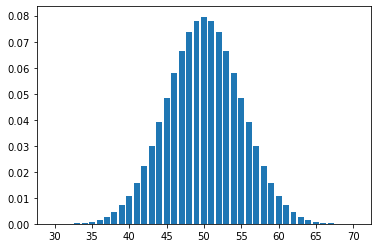

In [3]:
#Distribution of number of heads/girls probability 
plt.bar(np.arange(30,71,1), stats.binom.pmf(np.arange(30,71,1), n, p))

In [4]:
#Probability of 55 heads/girls or more
1-stats.binom.cdf(m-1, n, p)

0.18410080866334821

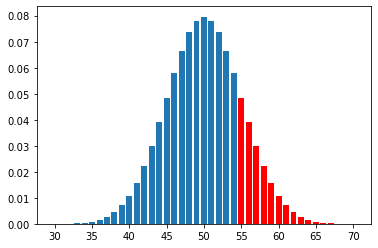

In [5]:
plt.bar(np.arange(30,m,1), stats.binom.pmf(np.arange(30,m,1), n, p))
plt.bar(np.arange(m,71,1), stats.binom.pmf(np.arange(m,71,1), n, p),color='red')
plt.show()

In [6]:
#Probability of outcomes as or more unlikely than 55
1-stats.binom.cdf(m-1, n, p)+stats.binom.cdf(n-m, 100, p)

0.3682016173266965

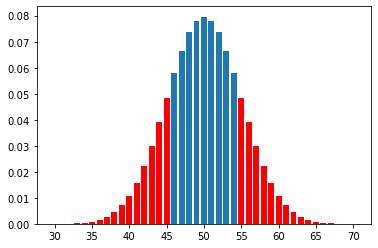

In [7]:
plt.bar(np.arange(n-m+1,m,1), stats.binom.pmf(np.arange(n-m+1,m,1), 100, 0.5))
plt.bar(np.arange(30,100-m+1,1), stats.binom.pmf(np.arange(30,n-m+1,1), 100, 0.5),color='red')
plt.bar(np.arange(m,71,1), stats.binom.pmf(np.arange(m,71,1), n, 0.5),color='red')
plt.show()

In [8]:
#b)
n = 1000
m = 550

<BarContainer object of 200 artists>

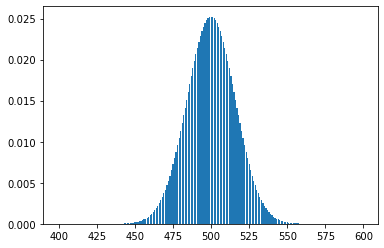

In [9]:
#Distribution of number of heads/girls probability 
plt.bar(np.arange(400,600,1), stats.binom.pmf(np.arange(400,600,1), n, p))

In [10]:
#Probability of 550 heads/girls or more
1-stats.binom.cdf(m-1, n, p)

0.0008652680424885428

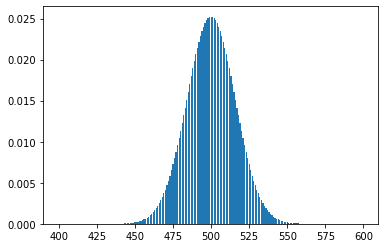

In [11]:
plt.bar(np.arange(400,m,1), stats.binom.pmf(np.arange(400,m,1), n, p))
plt.bar(np.arange(m,600,1), stats.binom.pmf(np.arange(m,600,1), n, p),color='red')
plt.show()

In [12]:
#Probability of outcomes as or more unlikely than 550
1-stats.binom.cdf(m - 1, n, p)+stats.binom.cdf(n - m, n, p)

0.0017305360849770451

In case a), we can't reject H0 at any confidence level over 65%. However, in case b), we reject H0 at the confidence level 99.8%. (Notice that it does not prove P(heads/girl)=550/1000=0.55. It only reject the assumption P(heads/girl)=0.5.)

## Example 2. Height distribution

In [13]:
#Upload the data
height = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

#Divide by gender
men_height = height[height.Gender=='Male'] 
women_height = height[height.Gender=='Female'] 

In [14]:
#Means of each
print(men_height.Height.mean(), women_height.Height.mean())

69.02634590621737 63.708773603424916


In [15]:
#SD of each
print(men_height.Height.std(), women_height.Height.std())

2.863362228660651 2.696284015765055


In [16]:
#Take 2 samples
h1 = women_height.sample(n = 10, random_state = 5000).Height
h2 = men_height.sample(n = 10, random_state = 5000).Height

print(h1.mean(), h2.mean())

64.65586930306053 67.44924749745371


## Z-test

Evaluate the hypotheses of whether these samples came from the pool of men: 

* $H0$ = h1/h2 follow normal ditribution with $\mu$ = 69.02 and $\sigma$ = 2.86
* $H1$ = h1/h2 does not follow normal ditribution with $\mu$ = 69.02 and $\sigma$ = 2.86

Note: if samples were larger (ideally size $n\geq 30$) the approach below would work for hypothesis without normality assumption, i.e. "H0: Sample follows a ditribution with $\mu$ = 69.02, $\sigma$ = 2.86", but for a sample as small as $n=10$, normality assumption is essential for normality of the $Z$ statistics below.

Under H0, the sample mean $\overline{x}$ should follow $\overline{x}\sim{\cal N}(\mu,\sigma\sqrt{n})$.

Introduce $Z$-statistic for the sample mean $\overline{x}$:
$$
Z=\frac{\overline{x}-\mu}{\sigma\sqrt{n}}
$$


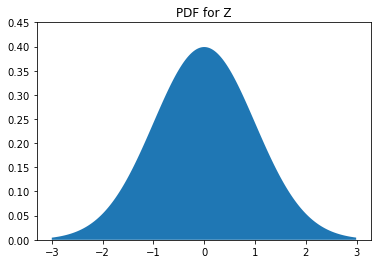

In [17]:
#Z statistic follows a standard normal distribution
x=np.arange(-3,3,0.01)
plt.title('PDF for Z')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.show()

In [18]:
#Male population parameters
mu = men_height.Height.mean()
sigma = men_height.Height.std()

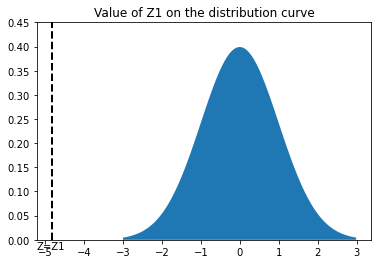

In [19]:
#Z score for sample 1
Z1 = (h1.mean() - mu)/sigma*len(h1)**0.5

x=np.arange(-3,3,0.01)
plt.title('Value of Z1 on the distribution curve')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.axvline(Z1, color='k', ls='--', lw=2.0)
plt.text(Z1-0.4,-0.02,'Z=Z1')
plt.show()

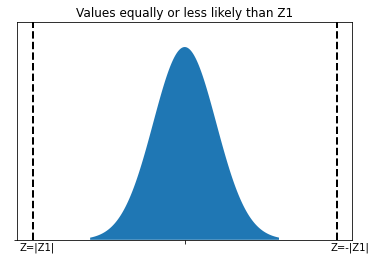

In [20]:
#Cumulative probability of the values equally or less likely than Z1
x=np.arange(-3,3,0.01)
plt.title('Values equally or less likely than Z1')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.fill_between(x[x>-Z1],stats.norm.pdf(x[x>-Z1],0,1),color='red')
plt.fill_between(x[x<Z1],stats.norm.pdf(x[x<Z1],0,1),color='red')
plt.axvline(Z1, color='k', ls='--', lw=2.0)
plt.axvline(-Z1, color='k', ls='--', lw=2.0)
plt.xticks([0], " ")
plt.yticks([0], " ")
plt.text(Z1-0.4,-0.02,'Z=|Z1|')
plt.text(-Z1-0.2,-0.02,'Z=-|Z1|')
plt.show()

In [21]:
p = 2*stats.norm.cdf(Z1)
print('P-value for the Z-test for the sample h1={}'.format(p))

P-value for the Z-test for the sample h1=1.3879693880160219e-06


For sample h1, we can reject the null with a confidence >99%. This makes sense since it was pulled from the female population. 

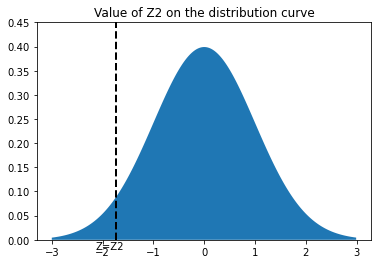

In [22]:
#Z score for sample 2
Z2 = (h2.mean() - mu)/sigma*len(h2)**0.5

x=np.arange(-3,3,0.01)
plt.title('Value of Z2 on the distribution curve')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.axvline(Z2, color='k', ls='--', lw=2.0)
plt.text(Z2-0.4,-0.02,'Z=Z2')
plt.show()

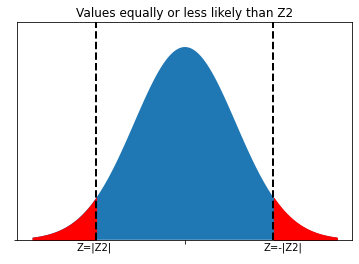

In [23]:
#Cumulative probability of the values equally or less likely than Z2
x=np.arange(-3,3,0.01)
plt.title('Values equally or less likely than Z2')
plt.ylim([0,0.45])
plt.fill_between(x,stats.norm.pdf(x,0,1))
plt.fill_between(x[x>-Z2],stats.norm.pdf(x[x>-Z2],0,1),color='red')
plt.fill_between(x[x<Z2],stats.norm.pdf(x[x<Z2],0,1),color='red')
plt.axvline(Z2, color='k', ls='--', lw=2.0)
plt.axvline(-Z2, color='k', ls='--', lw=2.0)
plt.xticks([0], " ")
plt.yticks([0], " ")
plt.text(Z2-0.4,-0.02,'Z=|Z2|')
plt.text(-Z2-0.2,-0.02,'Z=-|Z2|')
plt.show()

In [24]:
p = 2*stats.norm.cdf(Z2)
print('P-value for the Z-test for the sample h2={}'.format(p))

P-value for the Z-test for the sample h2=0.08155452833710221


For sample h2, we can't reject the hypothesis H0 at the 95% significance level. The sample could have been selected from the data on men heights, which was indeed the case as per above.

## Two-sample t-test

Now assume we do not know anything about the parameters of the underlying distribution (only that it was normal; if samples were larger than $30$ observations we would not even need that). Evaluate:

* $H0$: two samples have the same underlying distributions
* $H1$: two samples have the different underlying distributions

Use the $t$-statistics:
$$
t=\frac{\overline{x}_2-\overline{x}_1}{s\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$
where
$$
s=\sqrt{\frac{\sum (x_1-\overline{x}_1)^2+\sum (x_2-\overline{x}_2)^2}{df}}
$$$$
df = n_1+n_2-2,
$$
and $\overline{x}_1$, $\overline{x}_2$ are sample means, $n_1$, $n_2$ are sample sizes.

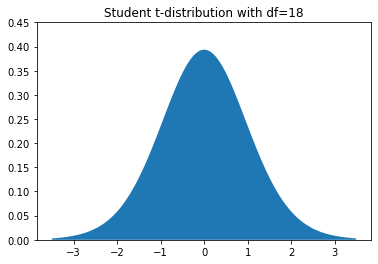

In [25]:
#t-statistics follows a Student t-distribution with df=18 degrees of freedom (similar to standard normal, but not exactly)
x=np.arange(-3.5,3.5,0.01)
df = 18
plt.title('Student t-distribution with df=18')
plt.ylim([0,0.45])
plt.fill_between(x,stats.t.pdf(x,df))
plt.show()

In [26]:
#Compute the observed means 
m1 = h1.mean()
m2 = h2.mean() 

#Compute the observed degress of freedom
n1 = len(h1)
n2 = len(h2)
df = n1 + n2

#Compute joint sample variance
s = ((((h1 - m1)**2).sum() + ((h2 - m2)**2).sum()) / df) ** 0.5

#Combine everything into the t-statistic
t = (m2 - m1) / s / (n1**-1+n2**-1)**0.5
t

2.9841969092040497

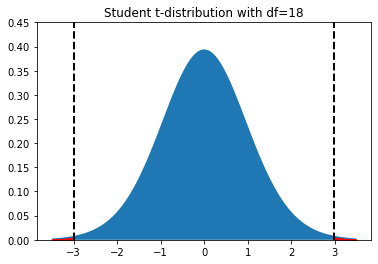

In [27]:
#Values of t as or more extreme than observed t
x=np.arange(-3.5,3.5,0.01)
plt.title('Student t-distribution with df=18')
plt.ylim([0,0.45])
plt.fill_between(x,stats.t.pdf(x,df))
plt.fill_between(x[x>t],stats.norm.pdf(x[x>t],0,1),color='red')
plt.fill_between(x[x<-t],stats.norm.pdf(x[x<-t],0,1),color='red')
plt.axvline(t, color='k', ls='--', lw=2.0)
plt.axvline(-t, color='k', ls='--', lw=2.0)
plt.show()

In [28]:
#P-value of red area above
2*stats.t.cdf(-t, df) 

0.007331971206622362

In [29]:
#One-step stats t-test function
stats.ttest_ind(h1,h2) 

Ttest_indResult(statistic=-2.8310577658558325, pvalue=0.011073660084596378)

So we can reject H0 with at least 95\% and even 98.8\% confidence

## Kolmogorov-Smirnov test

Test similarity of the empiric cumulative distribution functions $F_1$, $F_2$ for the two samples $h_1$, $h_2$.

Compute the upper bound of the difference between the two cumulative distribution functions:
$$
D=\sup_x|F_1(x)-F_2(x)|
$$

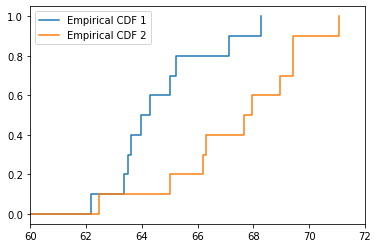

In [30]:
#Visualize the distribution functions
plt.step(np.sort(np.concatenate([[60],h1])), np.arange(n1+1, dtype=float)/n1, where='post', label='Empirical CDF 1')
plt.xlim([60,72])
plt.step(np.sort(np.concatenate([[60],h2])), np.arange(n2+1, dtype=float)/n2, where='post', label='Empirical CDF 2')
plt.legend()

We can see $D=0.6$

In [31]:
#K-S test
stats.ks_2samp(h1, h2)

KstestResult(statistic=0.6, pvalue=0.05244755244755244)

This means we can reject the null hypothesis at the nearly 95\% confidence level, although strictly speaking if we choose the 95% confidence level we won’t be able to reject it as p-value exceeds 5\%.

One may notice a difference in the confidence level provided by the t-test before and Kolmogorov-Smirnov test now. A possible explanation can refer to the fact that the t-test is only valid if the sample means follow a normal distribution, which would be the case either for large sample sizes or if the underlying distributions were normal. Since the sample sizes are relatively small, in order to apply t-test we effectively have to rely on our knowledge of the normality of the underlying distribution, which its not used by the Kolmogorov-Smirnov test. This is why having less information about the small samples it can’t be that definitive in rejecting the null hypothesis.

One can also use a one-sample version of the K-S test to test if a given sample follows a given theoretic distribution. Try it for the entire data sample

In [32]:
stats.kstest(men_height.Height, 'norm', args=(mu,sigma))

KstestResult(statistic=0.01076079246710368, pvalue=0.6049196596029793)

As p-value is pretty high we can't reject hypothesis that the distribution is normal with observed mean and std values; this actually looks pretty likely.